## 바이올린 플롯으로 분포 형태와 이상값 조사
- 바이올린 플롯: 히스토그램 + 박스플롯
- 사분위범위, 중앙값, 수염, 모든 값 범위의 관측 빈도

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97=pd.read_csv('C:/data-cleansing-main/Chapter05/data/nls97.csv')
nls97.set_index('personid',inplace=True)
covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidtotals.csv',parse_dates=['lastdate'])
covidtotals.set_index('iso_code',inplace=True)

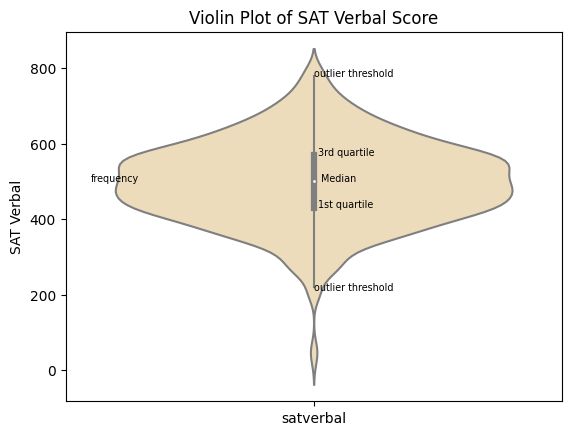

In [12]:
# SAT 언어능력 점수의 바이올린 플롯 그리기
sns.violinplot(data=nls97.loc[:, ['satverbal']], color="wheat", orient="v")             # 책 내용과 다름! 사용법 바뀐 듯
plt.title("Violin Plot of SAT Verbal Score")
plt.ylabel("SAT Verbal")
plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), '3rd quartile', horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), 'Median', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), '1st quartile', horizontalalignment='center', size='x-small')
plt.text(0.08, 210, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(-0.4, 500, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

In [5]:
nls97.loc[:,['weeksworked16','weeksworked16']].describe()       # nls97[['weeksworked16','weeksworked16']].describe() 과 같지만 loc를 쓴다면 저렇게 한다는 듯

,weeksworked16,weeksworked16
count,7068.000000,7068.000000
mean,39.127476,39.127476
std,21.336629,21.336629
min,0.000000,0.000000
25%,23.000000,23.000000
50%,53.000000,53.000000
75%,53.000000,53.000000
max,53.000000,53.000000


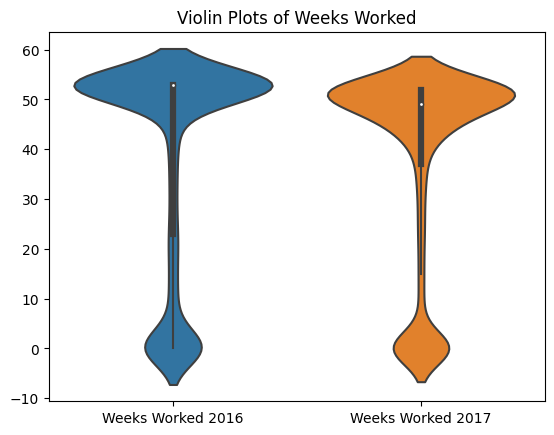

In [10]:
# 2016년과 2017년의 근무 주 수 보기 - 객체지향 접근법 사용
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16','weeksworked17']])
myplt.set_title("Violin Plots of Weeks Worked")
myplt.set_xticklabels(["Weeks Worked 2016","Weeks Worked 2017"])
plt.show()

- 사분위범위의 차이가 많이 난다. 주의깊게 봐야 함.

In [13]:
nls97.maritalstatus

personid
100061          Married
100139          Married
100284    Never-married
100292              NaN
100583          Married
              ...      
999291          Married
999406    Never-married
999543         Divorced
999698    Never-married
999963          Married
Name: maritalstatus, Length: 8984, dtype: object

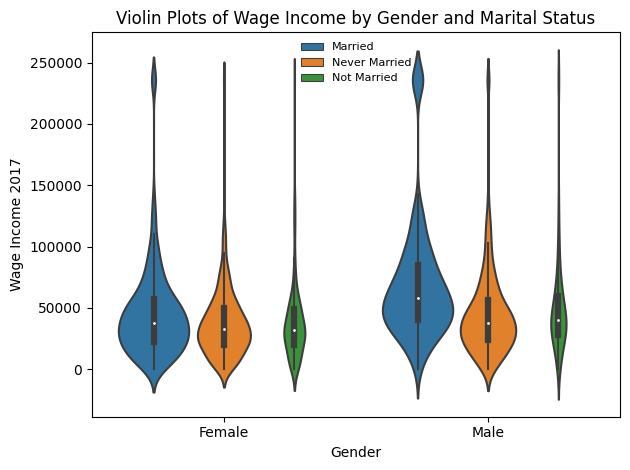

In [20]:
# 성별과 결혼 여부에 따른 임금소득의 바이올린 플롯
nls97['maritalstatuscollapsed']=nls97.maritalstatus.replace(['Married','Never-married','Divorced','Separated','Widowed'],['Married','Never Married','Not Married','Not Married','Not Married'])

sns.violinplot(data=nls97,x=nls97.gender,y=nls97.wageincome,hue=nls97.maritalstatuscollapsed, scale="count")        # 책 말고 이렇게 해야 원하는 그림이 나온다
plt.title("Violin Plots of Wage Income by Gender and Marital Status")
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

- 기혼 남성(여성의 경우에도 약간) 분포의 꼭대기에 소득이 뭉쳐있다. -> 임금 소득 분포에서 특이한 현상
- 임금소득 235,884 달러의 상한선이 있는 것으로 보인다

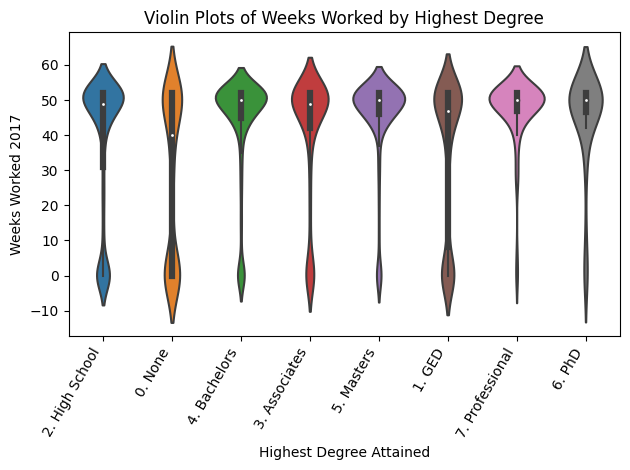

In [24]:
# 학력별 근무 주 수의 바이올린 플롯
myplt=sns.violinplot(data=nls97,x='highestdegree',y='weeksworked17',rotation=40)            # 기본적으로 데이터, x, y 이렇게 지정해야 나오는 듯?
myplt.set_xticklabels(myplt.get_xticklabels(),rotation=60,horizontalalignment='right')
myplt.set_title("Violin Plots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()


## 정리
1. 바이올린 플롯에 익숙해지면, 많은 정보를 시각적으로 표현해준다는 점을 높이 평가하게 될 것
2. 맷플롯립으로도 바이올린 플롯을 그릴 수 있지만 시본과 많이 다르다.